In [235]:
#preprocessing data
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime

In [236]:
dataset = pd.read_csv('incident_event_log.csv')

In [237]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

## Pré-Processing

In [238]:
#eliminer tous les attributs qu'on pas d'interet pour notre analyse
columns_to_drop = {'reassignment_count', 'reopen_count', 'sys_mod_count','sys_created_at', 'sys_updated_at','contact_type','cmdb_ci','impact','urgency','notify','problem_id','rfc','vendor','caused_by','closed_code','resolved_by','resolved_at'}
datasetV1 = dataset.drop(columns= columns_to_drop)
#data to calculate THE time resolution we need two attribute 'opened_at' 'closed_at'


In [239]:
#Taking care of missing data
#remplacer le signe'?' par des nan 'not a number'
datasetV1 = datasetV1.replace('?',np.nan)
datasetV2=datasetV1.dropna( axis=0,how='any')

In [240]:
#eliminer tous les attributs qu'on pas d'interet pour notre analyse
columns_to_drop1 = {'active','caller_id','made_sla','sys_created_by','sys_updated_by','location','subcategory','u_symptom','knowledge','u_priority_confirmation'}
datasetV3 = datasetV2.drop(columns= columns_to_drop1)

In [241]:
datasetV3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53762 entries, 4 to 141426
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   number            53762 non-null  object
 1   incident_state    53762 non-null  object
 2   opened_by         53762 non-null  object
 3   opened_at         53762 non-null  object
 4   category          53762 non-null  object
 5   priority          53762 non-null  object
 6   assignment_group  53762 non-null  object
 7   assigned_to       53762 non-null  object
 8   closed_at         53762 non-null  object
dtypes: object(9)
memory usage: 4.1+ MB


# Visualisation de données pour 7 attributs

In [242]:
datasetV3.head(10)
#number selct the last one or 2 or 3
#code 

,number,incident_state,opened_by,opened_at,category,priority,assignment_group,assigned_to,closed_at
4,INC0000047,New,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,Group 70,Resolver 89,06/03/2016 10:00
5,INC0000047,Active,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,Group 24,Resolver 31,06/03/2016 10:00
6,INC0000047,Active,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,Group 24,Resolver 31,06/03/2016 10:00
7,INC0000047,Active,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,Group 24,Resolver 31,06/03/2016 10:00
8,INC0000047,Active,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,Group 24,Resolver 31,06/03/2016 10:00
9,INC0000047,Active,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,Group 24,Resolver 31,06/03/2016 10:00
10,INC0000047,Awaiting User Info,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,Group 24,Resolver 89,06/03/2016 10:00
11,INC0000047,Resolved,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,Group 24,Resolver 89,06/03/2016 10:00
12,INC0000047,Closed,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,Group 24,Resolver 89,06/03/2016 10:00
20,INC0000060,New,Opened by 180,29/02/2016 06:38,Category 9,3 - Moderate,Group 25,Resolver 125,07/03/2016 13:00


## redandance de lignes on voit que numbre INC0000047 se reperte 9 fois

Faire un code pour selectionner just un ligne ou deux .. 

In [243]:
#datasetV3 = datasetV3.drop_duplicates(subset='number', keep="last")

In [244]:
def Horizon(H,dataset,Attribute):
    #select all duplicate 'number' values
    number_duplicate=[col for col in dataset[Attribute]]
    number=list(dict.fromkeys(number_duplicate))

    #reset the index for the dataset
    dataset=dataset.reset_index(drop=True)

    count=0
    result=pd.DataFrame()
    for i in range(len(number)):
        c=dataset[(dataset[Attribute]==number[i])]
        count+=len(c)
        #print(count)
        subset=c.loc[count-H:count, :]
        #print(subset)
        result=result.append(subset)
    return result

In [245]:
DatasetV4=Horizon(2,datasetV3,'number')

In [246]:
#TAKE JUST CLOSED INCIDENT 
#datasetV3= datasetV3.loc[datasetV3['incident_state'] == 'Closed'].reset_index().drop(columns={'index'})

In [247]:
DatasetV4.head(2)

,number,incident_state,opened_by,opened_at,category,priority,assignment_group,assigned_to,closed_at
7,INC0000047,Resolved,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,Group 24,Resolver 89,06/03/2016 10:00
8,INC0000047,Closed,Opened by 397,29/02/2016 04:40,Category 40,3 - Moderate,Group 24,Resolver 89,06/03/2016 10:00


## Encodage et normalisation

On encode toutes les données dont la colonne est un objet, ceci va nous permettre de savoir si l'on doit classifier la donnée après avoir effectué nos regressions car il est possible ces colonnes classées en catégorie aient avoir un impacte sur le temps d'execution d'un ticket

In [248]:
priority_mapping = {'1 - Critical':1,'2 - High':2,'3 - Moderate':3,'4 - Low':4}
DatasetV4["priority"].replace(priority_mapping,inplace= True)
DatasetV4["priority"] = DatasetV4["priority"].astype(int)

In [249]:
categorical = [col for col in DatasetV4.columns if DatasetV4[col].dtype==object]
numerical = [col for col in DatasetV4.columns if DatasetV4[col].dtype!=object]

In [250]:
print(categorical)

['number', 'incident_state', 'opened_by', 'opened_at', 'category', 'assignment_group', 'assigned_to', 'closed_at']


In [251]:
print(numerical)

['priority']


In [252]:
#web site ::: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'category'.
DatasetV4['category']= label_encoder.fit_transform(DatasetV4['category'])
DatasetV4['opened_by']= label_encoder.fit_transform(DatasetV4['opened_by'])
DatasetV4['number']= label_encoder.fit_transform(DatasetV4['number'])
DatasetV4['assignment_group']= label_encoder.fit_transform(DatasetV4['assignment_group'])
DatasetV4['assigned_to']= label_encoder.fit_transform(DatasetV4['assigned_to'])
DatasetV4['incident_state']= label_encoder.fit_transform(DatasetV4['incident_state'])

In [253]:
#DatasetV4 = DatasetV4.drop(columns='incident_state')

In [254]:
print(DatasetV4.shape)
print(DatasetV4.describe(include='all'))

(18590, 9)
              number  incident_state     opened_by         opened_at  \
count   18590.000000    18590.000000  18590.000000             18590   
unique           NaN             NaN           NaN              8688   
top              NaN             NaN           NaN  05/04/2016 15:52   
freq             NaN             NaN           NaN                10   
mean     4871.556751        3.783055     65.328080               NaN   
std      2795.116998        1.291044     50.636513               NaN   
min         0.000000        0.000000      0.000000               NaN   
25%      2453.000000        3.000000     27.000000               NaN   
50%      4912.500000        4.000000     43.000000               NaN   
75%      7300.750000        5.000000    102.000000               NaN   
max      9638.000000        5.000000    168.000000               NaN   

            category      priority  assignment_group   assigned_to  \
count   18590.000000  18590.000000      18590.000000  

## Calcule du Temps de resolution

In [255]:
#weeb site ::: https://www.programiz.com/python-programming/datetime/strptime
#we convert the format of date closing and opening incident using datetime object
DatasetV4['closed_at'] = DatasetV4['closed_at'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M'))
DatasetV4['opened_at'] = DatasetV4['opened_at'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M'))

In [256]:
#we calculate the time taken by each incident 
#calculates the difference between two dates
DatasetV4['Time (min)']=DatasetV4['closed_at']-DatasetV4['opened_at']
#converts the difference in terms of days
DatasetV4['Time (min)']=DatasetV4['Time (min)']/np.timedelta64(1,'D')
#time in minutes
DatasetV4['Time (min)']=DatasetV4['Time (min)']*24*60

In [257]:
DatasetV5 = DatasetV4.drop(columns={'closed_at','opened_at'})

In [258]:
DatasetV5.head(1)

,number,incident_state,opened_by,category,priority,assignment_group,assigned_to,Time (min)
7,0,5,100,27,3,12,165,8960.0


In [259]:
nan_index = DatasetV4[DatasetV5['category'].isnull()].index
print(nan_index)

Int64Index([], dtype='int64')


In [260]:
nan_index = DatasetV5[DatasetV4['priority'].isnull()].index
print(nan_index)

Int64Index([], dtype='int64')


In [261]:
DatasetV5['category'].unique()

array([27, 50, 38, 31, 12, 40, 24, 30, 11, 45, 46,  8, 28,  2, 49,  6, 32,
       36, 29, 22, 14, 20, 23, 10, 41, 25, 48, 18,  5, 47, 42, 33, 16, 13,
       26, 19, 39, 15, 21,  7,  4,  9, 43,  1, 37, 44,  0, 17, 35, 34,  3])

In [262]:
DatasetV5['opened_by'].unique()

array([100,  30,  12, 102, 155, 110, 136, 101, 151,  49,  11,  68,  50,
        43,  78,  92,  95,  35,  69,  48, 116, 140, 148, 165,  45,  70,
         8,  26, 138,  46, 142,  53, 129,  39, 109, 115,  57, 139, 127,
       137,  15,  34,  99,  98, 145, 146, 161, 122,  21,  86, 103,  88,
         7,  29,  20, 164, 113,  36, 153,  27,   3,  87, 158,  71, 152,
        94,  54,  33,  90, 121, 124, 106, 167,  66, 135,  97, 141,  28,
       117, 160,  64, 168,  93,  25,   4,  51, 105,  65, 123, 157,  75,
       154, 120,  74,  82,  63,  85,   0,   5, 163,  83, 128,  77, 144,
        47, 125, 147,  55,  19,  10, 133,  31, 159, 130,  84,  76,  56,
       166,  41, 108,   1,  38,  40,  80, 126,  89,  32, 134,  62,  59,
        60,  42,  73,  16,  17,   6,  81,   9,   2,  37, 114, 132,  22,
       131,  67,  14,  24,  44, 112, 118, 162,  13, 143,  18,  23, 150,
        58,  91,  52, 119,  61, 111, 104, 156, 149,  72, 107,  79,  96])

In [263]:
DatasetV5['number'].unique()

array([   0,    1,    2, ..., 9636, 9637, 9638])

In [264]:
DatasetV5 = DatasetV5.drop(columns={'number'})

In [265]:
DatasetV5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 7 to 53761
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   incident_state    18590 non-null  int32  
 1   opened_by         18590 non-null  int32  
 2   category          18590 non-null  int32  
 3   priority          18590 non-null  int32  
 4   assignment_group  18590 non-null  int32  
 5   assigned_to       18590 non-null  int32  
 6   Time (min)        18590 non-null  float64
dtypes: float64(1), int32(6)
memory usage: 726.2 KB


In [266]:
DatasetV5.head(4)

,incident_state,opened_by,category,priority,assignment_group,assigned_to,Time (min)
7,5,100,27,3,12,165,8960.0
8,3,100,27,3,12,165,8960.0
11,5,30,50,3,13,17,10462.0
12,3,30,50,3,13,17,10462.0


In [267]:
dataset_temp = DatasetV5.loc[:, DatasetV5.columns != 'Time (min)'] 

In [268]:
corr = dataset_temp.corr()
corr

,incident_state,opened_by,category,priority,assignment_group,assigned_to
incident_state,1.000000,-0.031585,0.070988,-0.002394,-0.199780,0.084185
opened_by,-0.031585,1.000000,-0.022880,-0.080935,-0.033844,-0.061887
category,0.070988,-0.022880,1.000000,-0.011147,-0.042515,0.008891
priority,-0.002394,-0.080935,-0.011147,1.000000,0.025726,0.025741
assignment_group,-0.199780,-0.033844,-0.042515,0.025726,1.000000,-0.067534
assigned_to,0.084185,-0.061887,0.008891,0.025741,-0.067534,1.000000


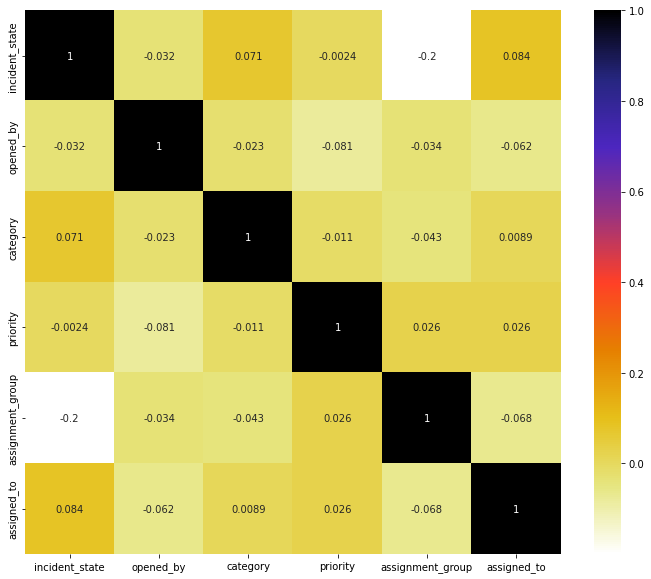

In [269]:
#feature selection using correlation
#web site :::: https://www.youtube.com/watch?v=FndwYNcVe0U&ab_channel=KrishNaik

plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

#see the size echanttionnage taken

## Splitting the dataset into the Training set and Test set

In [270]:
DatasetV5.columns

Index(['incident_state', 'opened_by', 'category', 'priority',
       'assignment_group', 'assigned_to', 'Time (min)'],
      dtype='object')

In [271]:
from sklearn.model_selection import train_test_split
X = DatasetV5.loc[:, DatasetV5.columns != 'Time (min)']
y = DatasetV5.loc[:,DatasetV5.columns == 'Time (min)']

print(X)
#field test_size=0.7,random_state = 0 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3,random_state = 0)

       incident_state  opened_by  category  priority  assignment_group  \
7                   5        100        27         3                12   
8                   3        100        27         3                12   
11                  5         30        50         3                13   
12                  3         30        50         3                13   
19                  5         12        38         3                16   
...               ...        ...       ...       ...               ...   
53753               3         69         3         3                 8   
53755               5         96        31         3                10   
53756               3         96        31         3                10   
53760               5         24        19         3                12   
53761               3         24        19         3                12   

       assigned_to  
7              165  
8              165  
11              17  
12              17  
19    

In [272]:
#display the time of prediction 
print("X_train dataset: ", X_train.shape) 
print("y_train dataset: ", y_train.shape) 
print("X_test dataset: ", X_test.shape) 
print("y_test dataset: ", y_test.shape)

X_train dataset:  (12393, 6)
y_train dataset:  (12393, 1)
X_test dataset:  (6197, 6)
y_test dataset:  (6197, 1)


In [273]:
#get better balance between classes
# web site ::: https://www.youtube.com/watch?v=YMPMZmlH5Bo&ab_channel=KrishNaik
#we should have many classes for time resolution so for the first time we go without balancing to see the defference in term of predection  


## Training the simple Linear Regression model on the Training set

In [274]:
#web site ::: https://www.youtube.com/watch?v=wTF6vzS9fy4&ab_channel=KrishNaik

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
#print(reg.score(X_train, y_train))
#print(reg.score(X_test, y_test))
#display 

LinearRegression()

try with all attributs 

# MAPE = (1/n) * Σ(|actual – prediction| / |actual|) * 100

In [275]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [276]:
pred_=reg.predict(X_test)
#print(pred_)
mape(y_test,pred_)

360.5359162093765

In [277]:
y_testa=np.array(y_test)
print(y_testa)


[[ 41552.]
 [  9079.]
 [184354.]
 ...
 [ 10509.]
 [ 20629.]
 [ 22017.]]


In [278]:
print(y_test.shape)

(6197, 1)


In [279]:
y_pred = reg.predict(X_test)
y_testt=np.array(y_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_testt.reshape(len(y_testt),1)),1))

[[ 24871.24  41552.  ]
 [ 23985.24   9079.  ]
 [ 25863.81 184354.  ]
 ...
 [ 21716.82  10509.  ]
 [ 26293.76  20629.  ]
 [ 25668.71  22017.  ]]


# Visualization

In [280]:
#Linear Cross-validation score
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

scores = cross_val_score(reg, X_train,y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Cross-validation scores: [ 0.  0.  0. -0.  0.]
Average cross-validation score: 0.0018


In [281]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 7989 to 8921
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   incident_state    12393 non-null  int32
 1   opened_by         12393 non-null  int32
 2   category          12393 non-null  int32
 3   priority          12393 non-null  int32
 4   assignment_group  12393 non-null  int32
 5   assigned_to       12393 non-null  int32
dtypes: int32(6)
memory usage: 387.3 KB


In [282]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 7989 to 8921
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time (min)  12393 non-null  float64
dtypes: float64(1)
memory usage: 193.6 KB


## GradientBoostingRegressor

In [283]:

from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)
score=regressor.score(X_test,y_test)

C:\Users\melho\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [284]:
pred_=regressor.predict(X_test)
#print(pred_)
mape(y_test,pred_)

359.4839072661116

## RandomForestRegressor

In [285]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
hyperparametres = { 'n_estimators':20 }
regressor = RandomForestRegressor(**hyperparametres)
regressor.fit(X_train,y_train)
score=regressor.score(X_test,y_test)
score

C:\Users\melho\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.5085160553238774

In [286]:
pred_=regressor.predict(X_test)
#print(pred_)
mape(y_test,pred_)

382.1104077048916

## Tree Decision Regressor

In [287]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=6)
regressor.fit(X, y)
score=regressor.score(X_test,y_test)
score

0.3382219295165839

In [288]:
pred_=regressor.predict(X_test)
#print(pred_)
mape(y_test,pred_)

363.2277492408045

In [289]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train
reg.fit(X_train_rm, y_train)
y_predict = reg.predict(X_train_rm)


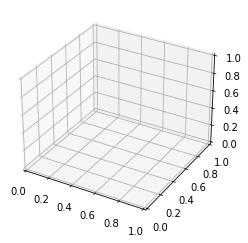

In [290]:
# Visualize the Data for Linear Regression
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


In [291]:
#Encoding categorical data converting all objects into numeric forms
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
#X = np.array(ct.fit_transform(datasetV4))

In [292]:
#encoding 
#datasetV5["priority"].unique()

In [293]:
#datasetV5["category"].unique()

In [294]:
#we need to calculate the time of resolution of each incident 
#lets get the first version of data 
